In [18]:
import numpy as np
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD, GRO, XTC
import warnings
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path

In [26]:
# suppress some MDAnalysis warnings about PSF files
warnings.filterwarnings('ignore')
root = Path('')
results_dir_1 = root / 'brunopalsina SSN main MD_nanoparticle' / 'simulation1'
inputs_dir = root / 'brunopalsina SSN main MD_nanoparticle' / 'input'
print(root, inputs_dir)

. brunopalsina SSN main MD_nanoparticle/input


In [78]:
psf = mda.Universe(inputs_dir/'Au.psf', inputs_dir/'initial_positions.pdb', results_dir_1/'MD300K.dcd')
all_atoms = psf.select_atoms('all')
center = psf.select_atoms('sphzone 1.8 ( all )')
atom = psf.select_atoms('bynum 1')

In [79]:
center.center_of_geometry

<bound method GroupBase.center_of_geometry of <AtomGroup with 4 atoms>>

In [87]:
print(len(psf.trajectory))

for i in psf.trajectory[500:]:
    frame = i.frame
    time = round(i.time - 500)
    print(f'Frame: {frame}, Time: {time}')


1001
Frame: 500, Time: 0
Frame: 501, Time: 1
Frame: 502, Time: 2
Frame: 503, Time: 3
Frame: 504, Time: 4
Frame: 505, Time: 5
Frame: 506, Time: 6
Frame: 507, Time: 7
Frame: 508, Time: 8
Frame: 509, Time: 9
Frame: 510, Time: 10
Frame: 511, Time: 11
Frame: 512, Time: 12
Frame: 513, Time: 13
Frame: 514, Time: 14
Frame: 515, Time: 15
Frame: 516, Time: 16
Frame: 517, Time: 17
Frame: 518, Time: 18
Frame: 519, Time: 19
Frame: 520, Time: 20
Frame: 521, Time: 21
Frame: 522, Time: 22
Frame: 523, Time: 23
Frame: 524, Time: 24
Frame: 525, Time: 25
Frame: 526, Time: 26
Frame: 527, Time: 27
Frame: 528, Time: 28
Frame: 529, Time: 29
Frame: 530, Time: 30
Frame: 531, Time: 31
Frame: 532, Time: 32
Frame: 533, Time: 33
Frame: 534, Time: 34
Frame: 535, Time: 35
Frame: 536, Time: 36
Frame: 537, Time: 37
Frame: 538, Time: 38
Frame: 539, Time: 39
Frame: 540, Time: 40
Frame: 541, Time: 41
Frame: 542, Time: 42
Frame: 543, Time: 43
Frame: 544, Time: 44
Frame: 545, Time: 45
Frame: 546, Time: 46
Frame: 547, Time: 

In [94]:
import MDAnalysis.analysis.rdf as rdf



irdf = rdf.InterRDF(center, all_atoms, 75, (1.8,15))
irdf.run()

[ 1.888  2.064  2.24   2.416  2.592  2.768  2.944  3.12   3.296  3.472
  3.648  3.824  4.     4.176  4.352  4.528  4.704  4.88   5.056  5.232
  5.408  5.584  5.76   5.936  6.112  6.288  6.464  6.64   6.816  6.992
  7.168  7.344  7.52   7.696  7.872  8.048  8.224  8.4    8.576  8.752
  8.928  9.104  9.28   9.456  9.632  9.808  9.984 10.16  10.336 10.512
 10.688 10.864 11.04  11.216 11.392 11.568 11.744 11.92  12.096 12.272
 12.448 12.624 12.8   12.976 13.152 13.328 13.504 13.68  13.856 14.032
 14.208 14.384 14.56  14.736 14.912]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.13229927e-02 3.77267970e+01 5.55466681e+01 1.43456902e+00
 0.00000000e+00 0.00000000e+00 1.22739904e-03 6.60168391e-01
 1.33025237e+01 9.47739726e+00 2.44940754e-01 0.00000000e+00
 4.36296636e-01 2.63837248e+01 3.48712634e+01 1.47460599e+00
 9.49547939e-03 3.39595499e+00 1.73278573e+01 2.93145514e+00
 1.16322736e-01 8.52034213e+00 2.55033672e+01 3.68598753e+00
 4.23724351e-01 6.51577741e+00 3.561382

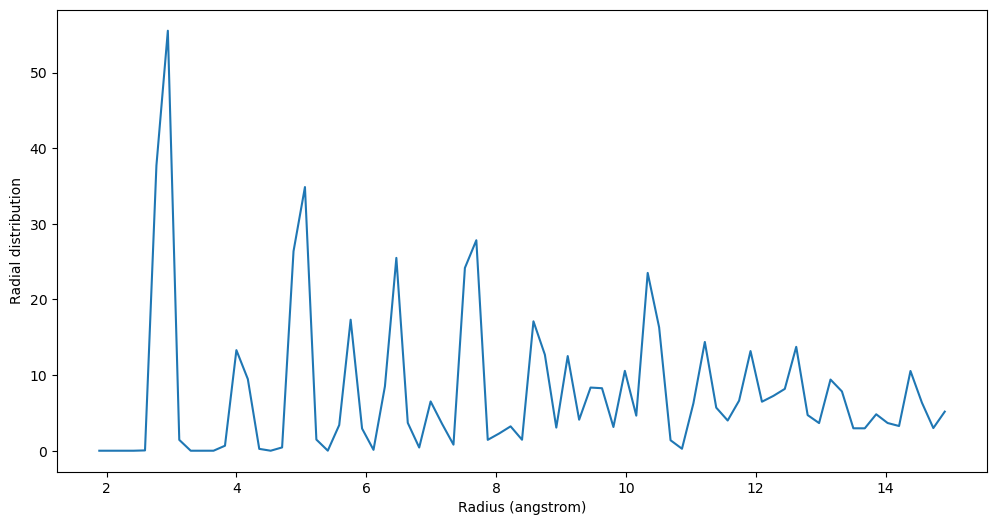

In [95]:
fig = plt.figure(figsize=(12,6))
plt.plot(irdf.results.bins, irdf.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.show()